In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import os
import pickle as pkl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from circuit_toolkit.plot_utils import saveallforms
import seaborn as sns
from os.path import join
import sys
sys.path.append("/n/home12/binxuwang/Github/Closed-loop-visual-insilico")
from core.model_load_utils import load_model_transform, MODEL_LAYER_FILTERS, LAYER_ABBREVIATION_MAPS
from neural_regress.feature_reduction_lib import FEATURE_REDUCTION_DEFAULTS, LAYER_TRANSFORM_FILTERS
from neural_regress.regress_eval_lib import format_result_df, plot_result_df_per_layer, construct_result_df_masked, \
    compute_pred_dict_D2_per_unit, format_result_df_tuple_index
#%% Utility Functions
from core.data_utils import load_from_hdf5, load_neural_data, load_neural_trial_resp_tensor, create_response_tensor, parse_image_fullpaths, extract_neural_data_dict_2025apr

/n/home12/binxuwang/Github/circuit_toolkit/circuit_toolkit/GAN_invert_utils.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange, tqdm


In [2]:
encoding_stim_dir = r"/n/holylabs/LABS/alvarez_lab/Lab/VVS_Accentuation/Stimuli/encodingstimuli_apr2025"
dataroot = r"/n/holylabs/LABS/alvarez_lab/Lab/VVS_Accentuation/Ephys_Data"
model_root = "/n/holylabs/LABS/alvarez_lab/Lab/VVS_Accentuation/Encoding_models/"

In [3]:
acc_stim_root = r"/n/holylabs/LABS/alvarez_lab/Everyone/Accentuate_VVS/accentuation_outputs"
config_root = r"/n/holylabs/LABS/alvarez_lab/Everyone/Accentuate_VVS/accentuation_configs"
for subject_id, filename in [
    ("venus_250426-250429", "venus_250426-250429_vvs-encodingstimuli_z1_rw80-250.h5"),
]:
    data_path = join(dataroot, filename)
    # model_output_dir = join(model_root, subject_id, "model_outputs_pca4all")
    # synopsis_dir = join(model_root, subject_id, "synopsis")
    # os.makedirs(synopsis_dir, exist_ok=True)
    h5data = load_from_hdf5(data_path)
    data_dict = extract_neural_data_dict_2025apr(h5data)
    reliability = data_dict['reliability']

In [9]:
list(h5data['trials'])

['response_peak', 'response_temporal', 'session_num', 'stimulus_name']

In [12]:
h5data['trials']["response_peak"].shape

(16260, 383)

In [11]:
h5data['trials']["response_temporal"]

array([[[7118.2866, 5479.2285, 3601.4783, ..., 5782.9126, 5006.441 ,
         4193.9224],
        [8095.461 , 6694.2803, 4334.0474, ..., 4428.362 , 4504.203 ,
         3904.8948],
        [6175.344 , 7055.2554, 3864.07  , ..., 4432.1875, 6058.7314,
         5649.9434],
        ...,
        [7135.968 , 5510.1074, 3631.659 , ..., 4766.3154, 3866.4976,
         4422.6597],
        [7916.63  , 4792.4346, 3454.505 , ..., 4546.6694, 3816.6414,
         3929.098 ],
        [6564.4653, 5564.04  , 3678.3506, ..., 3978.0137, 3447.915 ,
         3788.2852]],

       [[6741.95  , 6355.1934, 3789.1084, ..., 5008.603 , 4707.279 ,
         4076.1943],
        [7816.486 , 6610.1963, 4349.453 , ..., 4115.4346, 4897.136 ,
         3897.818 ],
        [6425.2495, 7563.2085, 3491.9736, ..., 4002.1409, 5371.8267,
         4344.479 ],
        ...,
        [7412.8203, 5811.8213, 3939.5403, ..., 4099.9517, 3900.153 ,
         4238.3076],
        [7743.303 , 5686.487 , 3597.837 , ..., 4746.3213, 3886.3188,
   

In [10]:
list(h5data['trials']["session_num"])


[b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_250426',
 b'venus_2

In [7]:
h5data['trials']['response_temporal']

array([[[7118.2866, 5479.2285, 3601.4783, ..., 5782.9126, 5006.441 ,
         4193.9224],
        [8095.461 , 6694.2803, 4334.0474, ..., 4428.362 , 4504.203 ,
         3904.8948],
        [6175.344 , 7055.2554, 3864.07  , ..., 4432.1875, 6058.7314,
         5649.9434],
        ...,
        [7135.968 , 5510.1074, 3631.659 , ..., 4766.3154, 3866.4976,
         4422.6597],
        [7916.63  , 4792.4346, 3454.505 , ..., 4546.6694, 3816.6414,
         3929.098 ],
        [6564.4653, 5564.04  , 3678.3506, ..., 3978.0137, 3447.915 ,
         3788.2852]],

       [[6741.95  , 6355.1934, 3789.1084, ..., 5008.603 , 4707.279 ,
         4076.1943],
        [7816.486 , 6610.1963, 4349.453 , ..., 4115.4346, 4897.136 ,
         3897.818 ],
        [6425.2495, 7563.2085, 3491.9736, ..., 4002.1409, 5371.8267,
         4344.479 ],
        ...,
        [7412.8203, 5811.8213, 3939.5403, ..., 4099.9517, 3900.153 ,
         4238.3076],
        [7743.303 , 5686.487 , 3597.837 , ..., 4746.3213, 3886.3188,
   

In [14]:
h5data['trials']["response_temporal"].shape

(60, 16260, 383)

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Get unique sessions
sessions = np.unique(h5data['trials']["session_num"])
response_temporal = h5data['trials']["response_temporal"]

# Calculate average response temporal per session
session_avg_responses = []
for session in sessions:
    session_mask = h5data['trials']["session_num"] == session
    session_responses = response_temporal[:, session_mask]
    avg_response = np.mean(session_responses, axis=1)
    session_avg_responses.append(avg_response)

session_avg_responses = np.array(session_avg_responses)
print(session_avg_responses.shape)

(4, 60, 383)


In [38]:
sessions

array([b'venus_250426', b'venus_250427', b'venus_250428', b'venus_250429'],
      dtype=object)

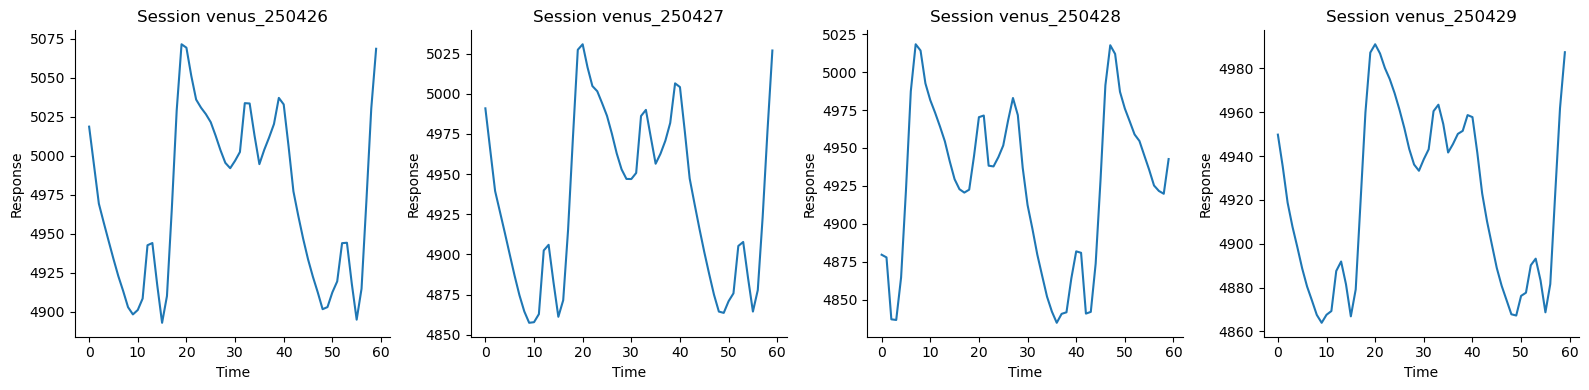

In [22]:
n_sessions = len(sessions)
n_cols = n_sessions
fig, axes = plt.subplots(1, len(sessions), figsize=(16, 4))
axes = axes.flatten()
for i, session in enumerate(sessions):
    ax = axes[i]
    im = ax.plot(session_avg_responses[i].mean(axis=-1), )
    ax.set_xlabel('Time')
    ax.set_ylabel('Response')
    ax.set_title(f'Session {session.decode() if isinstance(session, bytes) else session}')

plt.tight_layout()
plt.show()

### exclusion

In [26]:
h5data['trials']["response_peak"].shape

(16260, 383)

In [27]:
h5data['trials']["stimulus_name"]

array([b'sippycup_11.png', b'shared0570_nsd42852.png',
       b'fLoc_subset_015_body-5.jpg', ..., b'familiarObjects_65.png',
       b'shared0537_nsd40921.png', b'shared0133_nsd11488.png'],
      dtype=object)

array([[ 0.10551672,  0.11762571, -0.06625724, ..., -0.12776616,
        -0.19819947,  0.97912496],
       [-0.22398557, -0.00738235, -0.09809921, ..., -0.37821108,
        -0.33902335, -0.26299062],
       [-0.11689097, -0.02347188,  0.07750722, ...,  0.21111704,
         0.07375245, -0.46138167],
       ...,
       [-0.29155734,  0.01001324,  0.09127782, ..., -0.10853885,
        -0.06922203,  0.40402195],
       [-0.08138357, -0.0026369 , -0.20230255, ..., -0.00764995,
         0.15179937,  0.30526292],
       [ 0.04058535, -0.38527167,  0.05220303, ..., -0.0098507 ,
         0.0367343 , -0.00734833]])

In [34]:
repavg_resppeak = h5data['repavg']['response_peak']
trials_resppeak = h5data['trials']["response_peak"]
respavg_stimname = h5data['repavg']['stimulus_name']
trials_stimname = h5data['trials']["stimulus_name"]

In [47]:
session_mask = h5data['trials']["session_num"] != 0
print("valid trials", session_mask.sum(), "total trials", len(session_mask))
# Create averaged responses matrix with same shape as repavg response_peak
averaged_responses_redo = np.full_like(repavg_resppeak, np.nan)
for i, stim_name in enumerate(respavg_stimname):
    # Find matching trials for this stimulus
    trial_mask = (trials_stimname == stim_name) & session_mask
    if np.any(trial_mask):
        # Get the responses for matching trials
        matching_responses = trials_resppeak[trial_mask]
        # Average the responses across trials
        avg_response = np.mean(matching_responses, axis=0)
        averaged_responses_redo[i] = avg_response
    else:
        print(f"No trials found for stimulus: {stim_name}")

print(f"Created averaged responses matrix with shape: {averaged_responses_redo.shape}")
# Count NaN values in the averaged responses matrix
nan_count = np.isnan(averaged_responses_redo).sum()
total_elements = averaged_responses_redo.size
print(f"Number of NaN values: {nan_count}")
print(f"Total elements: {total_elements}")
print(f"Percentage of NaN values: {nan_count/total_elements*100:.2f}%")
# Calculate correlation between original repavg and our manually averaged responses
# First, create masks to exclude NaN values
valid_mask = ~(np.isnan(repavg_resppeak) | np.isnan(averaged_responses_redo))
# Flatten the arrays and keep only valid (non-NaN) values
repavg_flat = repavg_resppeak[valid_mask]
averaged_redo_flat = averaged_responses_redo[valid_mask]
# Calculate correlation
correlation = np.corrcoef(repavg_flat, averaged_redo_flat)[0, 1]
print(f"Correlation between original repavg and manually averaged responses (no exclusion): {correlation:.6f}")
# Also calculate some basic statistics
print(f"Mean difference: {np.mean(repavg_flat - averaged_redo_flat):.6f}")
print(f"Max absolute difference: {np.max(np.abs(repavg_flat - averaged_redo_flat)):.6f}")
print(f"RMS difference: {np.sqrt(np.mean((repavg_flat - averaged_redo_flat)**2)):.6f}")


valid trials 16260 total trials 16260
Created averaged responses matrix with shape: (969, 383)
Number of NaN values: 0
Total elements: 371127
Percentage of NaN values: 0.00%
Correlation between original repavg and manually averaged responses (no exclusion): 1.000000
Mean difference: 0.000000
Max absolute difference: 0.000000
RMS difference: 0.000000


In [ ]:
session_mask = h5data['trials']["session_num"] != b'venus_250428'
print("valid trials", session_mask.sum(), "total trials", len(session_mask))
# Create averaged responses matrix with same shape as repavg response_peak
averaged_responses_redo = np.full_like(repavg_resppeak, np.nan)
for i, stim_name in enumerate(respavg_stimname):
    # Find matching trials for this stimulus
    trial_mask = (trials_stimname == stim_name) & session_mask
    if np.any(trial_mask):
        # Get the responses for matching trials
        matching_responses = trials_resppeak[trial_mask]
        # Average the responses across trials
        avg_response = np.mean(matching_responses, axis=0)
        averaged_responses_redo[i] = avg_response
    else:
        print(f"No trials found for stimulus: {stim_name}")

print(f"Created averaged responses matrix with shape: {averaged_responses_redo.shape}")
# Count NaN values in the averaged responses matrix
nan_count = np.isnan(averaged_responses_redo).sum()
total_elements = averaged_responses_redo.size
print(f"Number of NaN values: {nan_count}")
print(f"Total elements: {total_elements}")
print(f"Percentage of NaN values: {nan_count/total_elements*100:.2f}%")
# Calculate correlation between original repavg and our manually averaged responses
valid_mask = ~(np.isnan(repavg_resppeak) | np.isnan(averaged_responses_redo))
# Flatten the arrays and keep only valid (non-NaN) values
repavg_flat = repavg_resppeak[valid_mask]
averaged_redo_flat = averaged_responses_redo[valid_mask]
# Calculate correlation
correlation = np.corrcoef(repavg_flat, averaged_redo_flat)[0, 1]
print(f"Correlation between original repavg and manually averaged responses (excluding the buggy session {b'venus_250428'}): {correlation:.6f}")
# Also calculate some basic statistics
print(f"Mean difference: {np.mean(repavg_flat - averaged_redo_flat):.6f}")
print(f"Max absolute difference: {np.max(np.abs(repavg_flat - averaged_redo_flat)):.6f}")
print(f"RMS difference: {np.sqrt(np.mean((repavg_flat - averaged_redo_flat)**2)):.6f}")

valid trials 12663 total trials 16260
Created averaged responses matrix with shape: (969, 383)
Number of NaN values: 0
Total elements: 371127
Percentage of NaN values: 0.00%
Correlation between original repavg and manually averaged responses (excluding the buggy session b'venus_250428'): 0.914360
Mean difference: -0.000117
Max absolute difference: 1.450255
RMS difference: 0.127252


### Compare tuning curves of the selected units

In [52]:
top5_channels = [331, 355, 9, 151, 79]
for ch in top5_channels:
    # Calculate correlation
    correlation = np.corrcoef(repavg_resppeak[:, ch], averaged_responses_redo[:, ch])[0, 1]
    MSE = np.mean((repavg_resppeak[:, ch] - averaged_responses_redo[:, ch])**2)
    print(f"Channel {ch}: Correlation between original repavg and manually averaged responses (excluding the buggy session {b'venus_250428'}): corr {correlation:.4f}, MSE {MSE:.4f}")

Channel 331: Correlation between original repavg and manually averaged responses (excluding the buggy session b'venus_250428'): corr 0.9792, MSE 0.0198
Channel 355: Correlation between original repavg and manually averaged responses (excluding the buggy session b'venus_250428'): corr 0.9796, MSE 0.0204
Channel 9: Correlation between original repavg and manually averaged responses (excluding the buggy session b'venus_250428'): corr 0.9780, MSE 0.0162
Channel 151: Correlation between original repavg and manually averaged responses (excluding the buggy session b'venus_250428'): corr 0.9719, MSE 0.0166
Channel 79: Correlation between original repavg and manually averaged responses (excluding the buggy session b'venus_250428'): corr 0.9708, MSE 0.0158


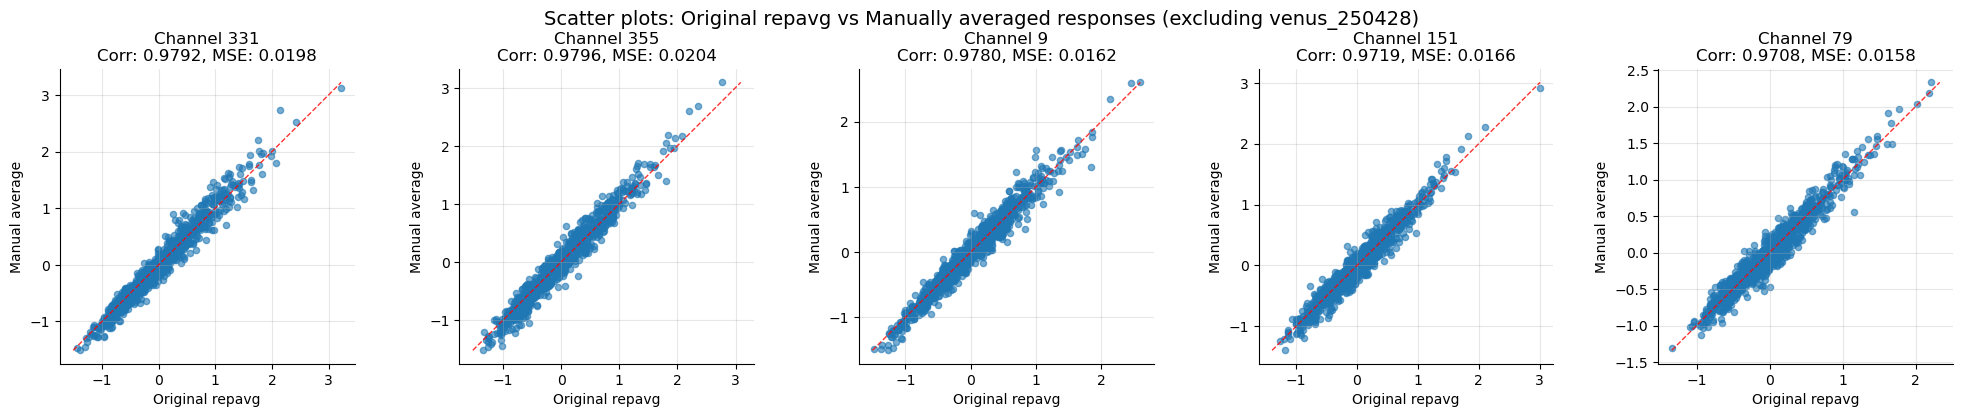

In [55]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
fig.suptitle('Scatter plots: Original repavg vs Manually averaged responses (excluding venus_250428)', fontsize=14)

for i, ch in enumerate(top5_channels):
    ax = axes[i]
    
    # Get data for this channel
    original = repavg_resppeak[:, ch]
    manual = averaged_responses_redo[:, ch]
    
    # Create scatter plot
    ax.scatter(original, manual, alpha=0.6, s=20)
    
    # Add diagonal line for perfect correlation
    min_val = min(np.nanmin(original), np.nanmin(manual))
    max_val = max(np.nanmax(original), np.nanmax(manual))
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8, linewidth=1)
    
    # Calculate correlation and MSE for display
    valid_mask = ~(np.isnan(original) | np.isnan(manual))
    if np.sum(valid_mask) > 0:
        correlation = np.corrcoef(original[valid_mask], manual[valid_mask])[0, 1]
        mse = np.mean((original[valid_mask] - manual[valid_mask])**2)
        ax.set_title(f'Channel {ch}\nCorr: {correlation:.4f}, MSE: {mse:.4f}')
    else:
        ax.set_title(f'Channel {ch}\nNo valid data')
    
    ax.set_xlabel('Original repavg')
    ax.set_ylabel('Manual average')
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()


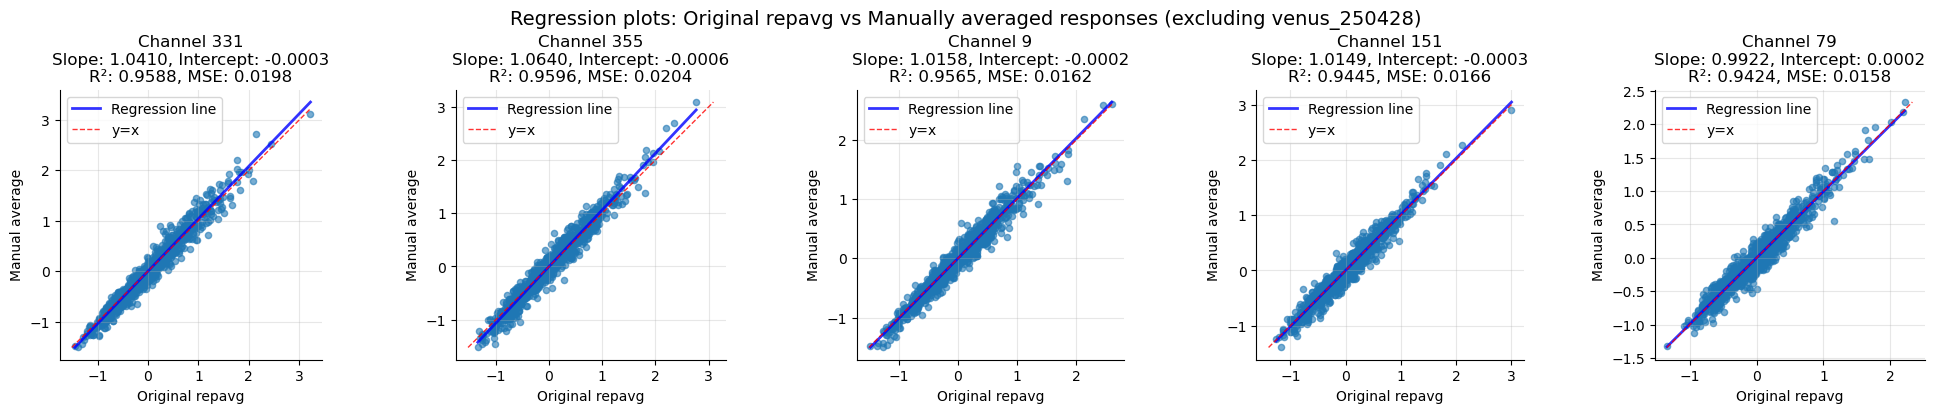

In [57]:
import matplotlib.pyplot as plt
from scipy import stats

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
fig.suptitle('Regression plots: Original repavg vs Manually averaged responses (excluding venus_250428)', fontsize=14)

for i, ch in enumerate(top5_channels):
    ax = axes[i]
    
    # Get data for this channel
    original = repavg_resppeak[:, ch]
    manual = averaged_responses_redo[:, ch]
    
    # Create scatter plot
    ax.scatter(original, manual, alpha=0.6, s=20)
    
    # Calculate regression and statistics
    valid_mask = ~(np.isnan(original) | np.isnan(manual))
    if np.sum(valid_mask) > 0:
        x_valid = original[valid_mask]
        y_valid = manual[valid_mask]
        
        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(x_valid, y_valid)
        
        # Add regression line
        min_val = np.nanmin(x_valid)
        max_val = np.nanmax(x_valid)
        x_line = np.array([min_val, max_val])
        y_line = slope * x_line + intercept
        ax.plot(x_line, y_line, 'b-', alpha=0.8, linewidth=2, label='Regression line')
        
        # Add diagonal line for perfect correlation
        min_diag = min(np.nanmin(x_valid), np.nanmin(y_valid))
        max_diag = max(np.nanmax(x_valid), np.nanmax(y_valid))
        ax.plot([min_diag, max_diag], [min_diag, max_diag], 'r--', alpha=0.8, linewidth=1, label='y=x')
        
        # Calculate MSE
        mse = np.mean((x_valid - y_valid)**2)
        
        ax.set_title(f'Channel {ch}\nSlope: {slope:.4f}, Intercept: {intercept:.4f}\nR²: {r_value**2:.4f}, MSE: {mse:.4f}')
    else:
        ax.set_title(f'Channel {ch}\nNo valid data')
    
    ax.set_xlabel('Original repavg')
    ax.set_ylabel('Manual average')
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')
    ax.legend()

plt.tight_layout()
plt.show()